In [1]:
import pandas as pd
from matplotlib import pyplot as plt

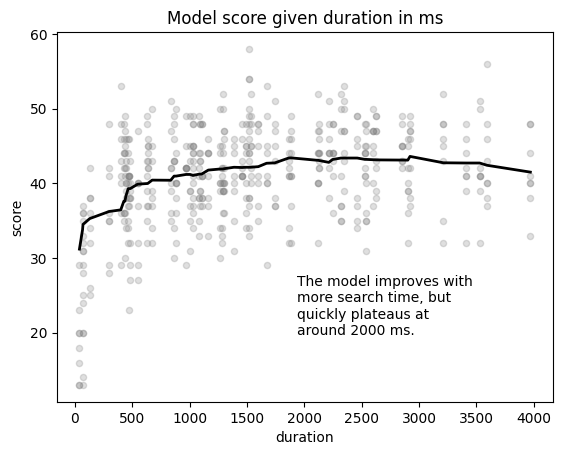

In [3]:
data = pd.read_csv('../data/test.csv')

fig, ax = plt.subplots()
data.plot.scatter('duration', 'score', ax=ax, alpha=0.25, c='gray')
data.duration = pd.to_timedelta(data.duration, 'ms')
rolling_scores = data.set_index('duration').sort_index().score.rolling('750ms', center=True).mean()

rolling_scores = rolling_scores.to_frame().reset_index()
rolling_scores.duration = rolling_scores.duration.dt.total_seconds() * 1000


ax.plot(rolling_scores.duration, rolling_scores.score, lw=2, c='k')
plt.figtext(0.5, 0.25, 'The model improves with\nmore search time, but\nquickly plateaus at\naround 2000 ms.', fontsize=10)

plt.title('Model score given duration in ms')
plt.show()

